<a href="https://colab.research.google.com/github/seansothey/CSC685/blob/master/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import time
from datetime import timedelta
import math
import os

In [0]:
cifar10 = keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

#Explore the data

In [197]:
X_train.shape

(50000, 32, 32, 3)

In [198]:
X_test.shape

(10000, 32, 32, 3)

In [199]:
y_train.shape

(50000, 1)

In [200]:
y_test.shape

(10000, 1)

In [201]:
num_classes = len(np.unique(y_train))
num_classes

10

#Preprocess the data

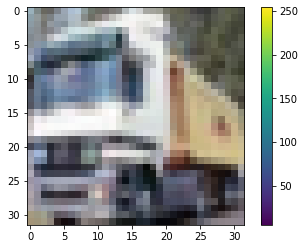

In [202]:
#View image #1
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)

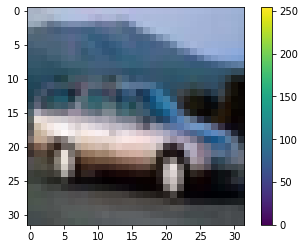

In [203]:
#View image #4
plt.figure()
plt.imshow(X_train[4])
plt.colorbar()
plt.grid(False)

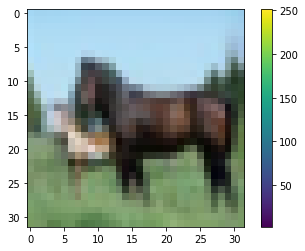

In [204]:
#View image #12
plt.figure()
plt.imshow(X_train[12])
plt.colorbar()
plt.grid(False)

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

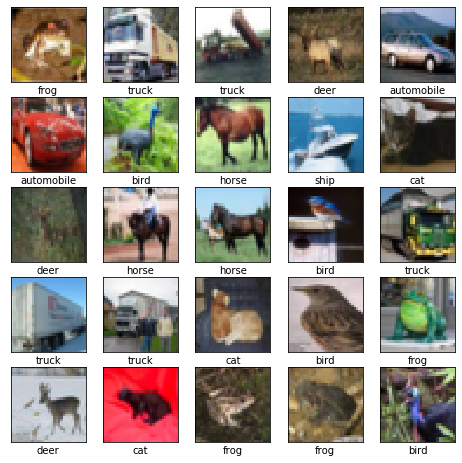

In [205]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])

#Use PCA to reduce the dataset's dimensionality

Reshape dataset

In [0]:
nsamples, nx, ny, nz = X_train.shape
X_train_2d = X_train.reshape((nsamples,nx*ny*nz))

nsamples, nx, ny, nz = X_test.shape
X_test_2d = X_test.reshape((nsamples,nx*ny*nz))

nsamples, nx = y_train.shape
y_train_1d = y_train.reshape(nsamples)

In [207]:
X_train_2d.shape, X_test_2d.shape, y_train_1d.shape

((50000, 3072), (10000, 3072), (50000,))

Choosing n-components

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X_train_2d[0:]) #select data from 0 to end

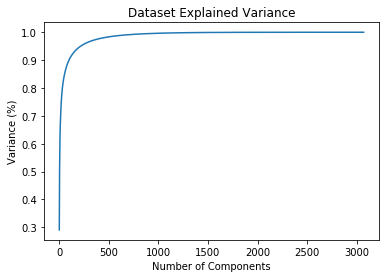

In [209]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

We picked the elbow value, roughly n = 500, which is variance = 95-100%

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 500)
X_train_reduced = pca.fit_transform(data_rescaled)

In [0]:
X_test_reduced = pca.transform(X_test_2d)

In [247]:
X_train_reduced.shape, X_test_reduced.shape

((50000, 500), (10000, 500))

Now, we have a new dataset (50000, 500) which reduce from (50000, 3072)

#Multiclass classification

In [248]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(X_train_reduced, y_train_1d)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Apply the classifier on test dataset

In [0]:
y_test_preds = rnd_clf.predict(X_test_reduced)
y_proba = rnd_clf.predict_proba(X_test_reduced)

y_train_preds = rnd_clf.predict(X_train_reduced)

In [251]:
#See the accuracy testing vs training
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_preds), accuracy_score(y_train, y_train_preds)

(0.1135, 0.99482)

#Confusion Matrix

In [252]:
conf = confusion_matrix(y_test, y_test_preds)
conf

array([[118, 320,  45, 100,  15,  94,  28,  65,  34, 181],
       [ 96, 363,  31,  87,  17,  78,  19,  85,  36, 188],
       [111, 303,  38, 110,  15,  93,  24,  93,  25, 188],
       [115, 287,  38,  84,  15, 103,  29,  88,  33, 208],
       [113, 284,  43,  87,  16,  97,  25, 105,  29, 201],
       [ 98, 291,  37,  98,  15, 101,  29,  88,  27, 216],
       [100, 307,  37,  98,  14, 110,  35,  72,  26, 201],
       [108, 300,  34,  90,  17,  94,  17,  98,  27, 215],
       [135, 284,  42,  79,  16,  88,  26,  71,  46, 213],
       [104, 317,  22,  92,  14,  80,  23,  76,  36, 236]])

# Plot confusion matrix

Text(0.5, 15.0, 'Predicted label')

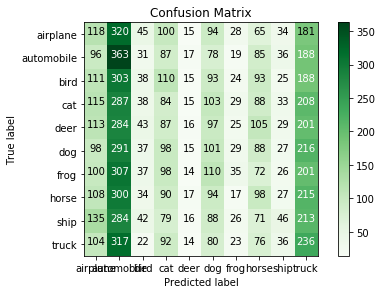

In [254]:
import itertools

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 1, 'Confusion Matrix')

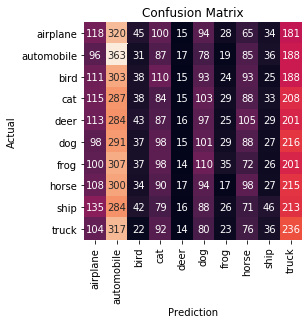

In [255]:
import seaborn as sns
mat = confusion_matrix(y_test_preds, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.title('Confusion Matrix')

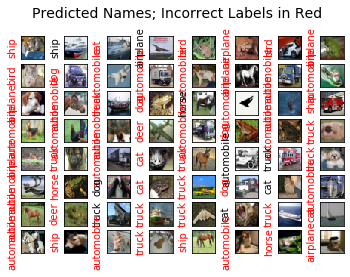

In [256]:
fig, ax = plt.subplots(8, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(class_names[y_test_preds[i]].split()[-1],
                   color='black' if y_test_preds[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Therefore, we can see the number of correct prediction is very low just in the first 64 test dataset

#Sensitivity, Specificity and F1-Score 

In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_preds,target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.11      0.12      0.11      1000
  automobile       0.12      0.36      0.18      1000
        bird       0.10      0.04      0.06      1000
         cat       0.09      0.08      0.09      1000
        deer       0.10      0.02      0.03      1000
         dog       0.11      0.10      0.10      1000
        frog       0.14      0.04      0.06      1000
       horse       0.12      0.10      0.11      1000
        ship       0.14      0.05      0.07      1000
       truck       0.12      0.24      0.15      1000

    accuracy                           0.11     10000
   macro avg       0.11      0.11      0.10     10000
weighted avg       0.11      0.11      0.10     10000



#Perform Cross Validation with 5 folds

In [222]:
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf, X_train_2d, y_train_1d, cv=5, scoring="accuracy")

array([0.3457, 0.3412, 0.3491, 0.3451, 0.3469])

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2d.astype(np.float64))
cross_val_score(rnd_clf, X_train_scaled, y_train_1d, cv=5, scoring="accuracy")

array([0.3471, 0.3408, 0.3479, 0.3445, 0.3467])

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rnd_clf, X_train_scaled, y_train_1d, cv=5)

Confusion Matrix & Accuracy

In [225]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[2568,  343,  380,  172,  181,  140,  121,  187,  678,  230],
       [ 463, 2209,  221,  278,  209,  191,  217,  195,  348,  669],
       [ 656,  296, 1411,  480,  791,  329,  506,  255,  141,  135],
       [ 399,  422,  697, 1200,  479,  737,  479,  251,  129,  207],
       [ 405,  271,  991,  427, 1434,  298,  562,  362,  116,  134],
       [ 338,  348,  681,  950,  469, 1271,  384,  328,   97,  134],
       [ 232,  353,  761,  603,  742,  405, 1592,  152,   54,  106],
       [ 398,  383,  563,  472,  564,  410,  296, 1480,  115,  319],
       [ 887,  543,  231,  202,  110,  156,   76,  109, 2311,  375],
       [ 477, 1131,  229,  271,  137,  169,  142,  256,  394, 1794]])

In [226]:
#Pretend we reached perfection
y_train_perfect_predictions = y_train
confusion_matrix(y_train, y_train_perfect_predictions)

array([[5000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 5000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5000,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5000]])

Average Accuracy of Cross Validation

In [227]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred, average='micro')

0.3454

#Plot confusion matrix of Cross Validation

In [0]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

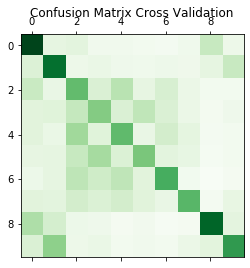

In [229]:
plt.matshow(conf_mx, cmap=plt.cm.Greens)
plt.title("Confusion Matrix Cross Validation")
plt.show()

#Sensitivity, Specificity and F1-Score for Cross Validation

In [230]:
print(classification_report(y_train, y_train_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.38      0.51      0.43      5000
  automobile       0.35      0.44      0.39      5000
        bird       0.23      0.28      0.25      5000
         cat       0.24      0.24      0.24      5000
        deer       0.28      0.29      0.28      5000
         dog       0.31      0.25      0.28      5000
        frog       0.36      0.32      0.34      5000
       horse       0.41      0.30      0.35      5000
        ship       0.53      0.46      0.49      5000
       truck       0.44      0.36      0.39      5000

    accuracy                           0.35     50000
   macro avg       0.35      0.35      0.35     50000
weighted avg       0.35      0.35      0.35     50000



#Plots sensitivity and specificity against the number of folds

In [231]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)

ValueError: ignored

*The precision_recall_curve function not supported with multiclass*

#ROC curve (Receiver Operating Characteristic curve)

In [233]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

ValueError: ignored

*The roc_curve function not supported with multiclass*